# Exercici 1
     - Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

In [191]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
lloguer=pd.read_csv('preu lloguer per trimestre i barri.csv')
lloguer.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [193]:
#No hi ha cap null perquè son 584 dades
lloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


la columna preu hauria de ser un integer, al intentar canviar-ho directament amb astype() dóna error.

In [195]:
#busquem canviar la columna preu descobrint quin valor dóna error i modificant els valors no vàlids a NaN
try:
    lloguer['Preu'] = lloguer['Preu'].astype('float64')
except ValueError as error:
    print (error)
lloguer['Preu'] = pd.to_numeric(lloguer['Preu'],errors='coerce')
nuls=lloguer['Preu'].isna().sum()
print(nuls)

could not convert string to float: '--'
44


Ara ja s'ha trobat el problema, a algun registre apareix --, pel que es canvia a Nan, per despres poder eliminar-ho.

In [196]:
#Ara tenim 584 registres no nuls a totes les columnes excepte a preu on hi ha 540.
lloguer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


Ara hi ha menys dades a la columna preus, pero s'ha canviat a float64 (numéric amb decimals).

In [197]:
#para trabajar sin los valores nulos
lloguer=lloguer.dropna()
lloguer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB


In [199]:
#saber si hay datos duplicados. Se muestra que no tenemos datos duplicados
lloguer.duplicated().sum()

0

In [132]:
lloguer

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [45]:
#Aquí veiem que únicament ens mostra dades del 2021.
lloguer['Any'].unique()

array([2021])

In [13]:
#primer problema, les dades no totes son iguals. Hi ha dos tipus de dades diferents, segons superficie o preu mes

lloguer['Lloguer_mitja'].sort_values(ascending=True)

0                Lloguer mitjà mensual (Euros/mes)
478              Lloguer mitjà mensual (Euros/mes)
480              Lloguer mitjà mensual (Euros/mes)
481              Lloguer mitjà mensual (Euros/mes)
482              Lloguer mitjà mensual (Euros/mes)
                          ...                     
262    Lloguer mitjà per superfície (Euros/m2 mes)
261    Lloguer mitjà per superfície (Euros/m2 mes)
259    Lloguer mitjà per superfície (Euros/m2 mes)
269    Lloguer mitjà per superfície (Euros/m2 mes)
583    Lloguer mitjà per superfície (Euros/m2 mes)
Name: Lloguer_mitja, Length: 540, dtype: object

In [14]:
#el preu no es pot comparar perquè no té en compte els mateixos valors
lloguer['Lloguer_mitja'].unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

Se separan los datos en dos dataframes diferentes para poder trabajar los datos por separado. Se crean 2 variables diferentes correspondientes al criterio establecido. Finalmente se tendrá que acabar de trabajar con una de ellas, sinó se repetiria constantemente con resultados parecidos.

In [221]:
preu_mes = lloguer[lloguer['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']

preu_superficie=lloguer[lloguer['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']

In [10]:
#se agrupa por barrios para hacer el resumen estadístico

resum1=preu_mes.groupby('Nom_Districte',)['Preu'].describe()
resum1


,count,mean,std,min,25%,50%,75%,max
Nom_Districte,,,,,,,,
Ciutat Vella,16.0,858.925000,70.783468,759.2,800.225,870.00,924.500,968.4
Eixample,24.0,1000.545833,105.239524,887.1,922.800,964.95,1070.800,1220.8
Gràcia,20.0,877.265000,65.810072,745.4,859.175,895.65,921.800,961.0
Horta-Guinardó,40.0,765.007500,61.542836,653.5,726.450,756.30,817.825,884.2
Les Corts,12.0,1214.066667,359.670946,904.8,969.000,1007.90,1618.475,1816.5
Nou Barris,40.0,664.292500,71.115199,488.1,624.125,671.80,700.675,803.7
Sant Andreu,26.0,721.196154,94.357187,447.5,647.800,755.45,792.500,827.2
Sant Martí,40.0,916.450000,178.808413,700.5,795.350,869.20,976.975,1364.7
Sants-Montjuïc,28.0,798.932143,38.952935,691.9,778.325,805.25,818.350,872.5


In [11]:
#Resum estadístic segons el preu de la superfície als diferents districtes
resum2=preu_superficie.groupby('Nom_Districte',)['Preu'].describe()
resum2

,count,mean,std,min,25%,50%,75%,max
Nom_Districte,,,,,,,,
Ciutat Vella,16.0,13.775000,1.417274,12.3,12.875,13.20,14.375,16.4
Eixample,24.0,13.300000,0.353861,12.5,13.000,13.30,13.600,14.0
Gràcia,20.0,13.380000,0.661418,12.1,12.800,13.60,13.900,14.3
Horta-Guinardó,40.0,11.987500,0.810567,9.5,11.675,12.10,12.625,13.4
Les Corts,12.0,14.008333,0.994949,12.5,13.250,13.90,14.425,15.8
Nou Barris,40.0,10.922500,1.160788,8.1,9.975,11.45,11.725,12.7
Sant Andreu,26.0,11.153846,1.215971,6.7,10.750,11.60,11.875,12.5
Sant Martí,40.0,13.440000,1.855664,10.8,11.675,13.15,14.675,17.3
Sants-Montjuïc,28.0,12.678571,0.950383,10.2,12.450,13.00,13.200,13.8


In [18]:
#Resum estadístic segons el preu del mes, clasificat per barri i per districte
resumen_total_mes = preu_mes.groupby(['Nom_Districte', 'Nom_Barri'])['Preu'].describe()
resumen_total_mes

count      mean  \
Nom_Districte       Nom_Barri                                                
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera    4.0   888.350   
                    el Barri Gòtic                           4.0   946.275   
                    el Raval                                 4.0   769.175   
                    la Barceloneta                           4.0   831.900   
Eixample            Sant Antoni                              4.0   929.375   
...                                                          ...       ...   
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova               4.0  1217.525   
                    Sarrià                                   4.0  1300.000   
                    Vallvidrera, el Tibidabo i les Planes    4.0  1207.600   
                    el Putxet i el Farró                     4.0  1004.375   
                    les Tres Torres                          4.0  1542.725   

                                                                  std     min  \
Nom_Districte       Nom_Barri                                                   
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera   25.537750   862.1   
                    el Barri Gòtic                          17.898114   929.6   
                    el Raval                                 6.822695   759.2   
                    la Barceloneta                          31.476023   808.9   
Eixample            Sant Antoni                             23.512745   898.7   
...                                                               ...     ...   
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova              43.466721  1159.6   
                    Sarrià                                  33.668284  1263.9   
                    Vallvidrera, el Tibidabo i les Planes  232.375013  1009.5   
                    el Putxet i el Farró                    14.626318   990.1   
                    les Tres Torres                         76.881527  1429.0   

                                                                25%      50%  \
Nom_Districte       Nom_Barri                                                  
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera   875.075   884.25   
                    el Barri Gòtic                          932.975   943.55   
                    el Raval                                767.675   771.65   
                    la Barceloneta                          813.325   820.40   
Eixample            Sant Antoni                             921.275   931.55   
...                                                             ...      ...   
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova             1204.600  1222.85   
                    Sarrià                                 1285.650  1295.45   
                    Vallvidrera, el Tibidabo i les Planes  1058.400  1144.60   
                    el Putxet i el Farró                    996.250  1001.50   
                    les Tres Torres                        1532.125  1572.25   

                                                                75%     max  
Nom_Districte       Nom_Barri                                                
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera   897.525   922.8  
                    el Barri Gòtic                          956.850   968.4  
                    el Raval                                773.150   774.2  
                    la Barceloneta                          838.975   877.9  
Eixample            Sant Antoni                             939.650   955.7  
...                                                             ...     ...  
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova             1235.775  1264.8  
                    Sarrià                                 1309.800  1345.2  
                    Vallvidrera, el Tibidabo i les Planes  1293.800  1531.7  
                    el Putxet i el Farró                   1009.625  1024.4  
             

In [19]:
#Resum estadístic segons el preu de superfície, clasificat per barri i per districte
resumen_total_superficie = preu_superficie.groupby(['Nom_Districte', 'Nom_Barri'])['Preu'].describe()
resumen_total_superficie

count    mean  \
Nom_Districte       Nom_Barri                                              
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera    4.0  13.575   
                    el Barri Gòtic                           4.0  12.575   
                    el Raval                                 4.0  12.925   
                    la Barceloneta                           4.0  16.025   
Eixample            Sant Antoni                              4.0  12.975   
...                                                          ...     ...   
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova               4.0  15.150   
                    Sarrià                                   4.0  15.900   
                    Vallvidrera, el Tibidabo i les Planes    4.0  14.525   
                    el Putxet i el Farró                     4.0  14.250   
                    les Tres Torres                          4.0  15.725   

                                                                std   min  \
Nom_Districte       Nom_Barri                                               
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera  0.309570  13.3   
                    el Barri Gòtic                         0.275379  12.3   
                    el Raval                               0.125831  12.8   
                    la Barceloneta                         0.411299  15.5   
Eixample            Sant Antoni                            0.368556  12.5   
...                                                             ...   ...   
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova             0.310913  14.7   
                    Sarrià                                 0.216025  15.6   
                    Vallvidrera, el Tibidabo i les Planes  2.918190  11.4   
                    el Putxet i el Farró                   0.238048  14.1   
                    les Tres Torres                        0.607591  15.0   

                                                              25%    50%  \
Nom_Districte       Nom_Barri                                              
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera  13.375  13.50   
                    el Barri Gòtic                         12.375  12.55   
                    el Raval                               12.875  12.90   
                    la Barceloneta                         15.800  16.10   
Eixample            Sant Antoni                            12.875  13.00   
...                                                           ...    ...   
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova             15.075  15.25   
                    Sarrià                                 15.825  15.95   
                    Vallvidrera, el Tibidabo i les Planes  12.600  14.35   
                    el Putxet i el Farró                   14.100  14.15   
                    les Tres Torres                        15.375  15.75   

                                                              75%   max  
Nom_Districte       Nom_Barri                                            
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera  13.700  14.0  
                    el Barri Gòtic                         12.750  12.9  
                    el Raval                               12.950  13.1  
                    la Barceloneta                         16.325  16.4  
Eixample            Sant Antoni                            13.100  13.4  
...                                                           ...   ...  
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova             15.325  15.4  
                    Sarrià                                 16.025  16.1  
                    Vallvidrera, el Tibidabo i les Planes  16.275  18.0  
                    el Putxet i el Farró                   14.300  14.6  
                    les Tres Torres                        16.100  16.4  

[68 rows x 8 columns]

Nom_Districte        Nom_Barri                            
Ciutat Vella         Sant Pere, Santa Caterina i la Ribera    13.575
                     el Barri Gòtic                           12.575
                     el Raval                                 12.925
                     la Barceloneta                           16.025
Eixample             Sant Antoni                              12.975
                                                               ...  
Sarrià-Sant Gervasi  Sant Gervasi - la Bonanova               15.150
                     Sarrià                                   15.900
                     Vallvidrera, el Tibidabo i les Planes    14.525
                     el Putxet i el Farró                     14.250
                     les Tres Torres                          15.725
Name: mean, Length: 68, dtype: float64

## Visualització

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)

In [13]:
value1=lloguer['Nom_Districte'].value_counts()
value1

Nom_Districte
Horta-Guinardó         80
Nou Barris             80
Sant Martí             80
Sants-Montjuïc         56
Sant Andreu            52
Eixample               48
Sarrià-Sant Gervasi    48
Gràcia                 40
Ciutat Vella           32
Les Corts              24
Name: count, dtype: int64

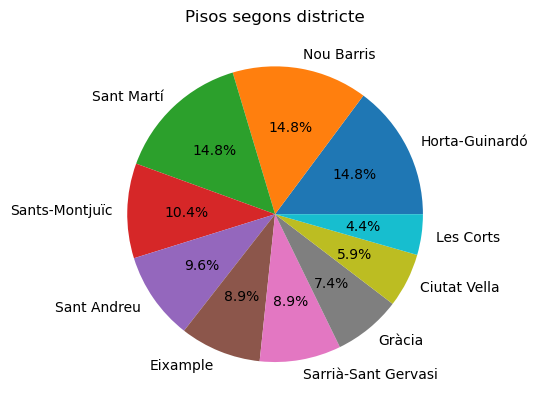

In [14]:
#En aquest cas utilitzarem la variable categòrica Districte fent ús de la variable anterior.
#Se convierte a una lista para poder hacer al visualización. Cuenta los valores totales.
plt.pie(value1.values.tolist(), labels=value1.index.tolist(), autopct='%1.1f%%')
plt.savefig('pie_districte.png') #S'exporta el gràfic en format imatge png
plt.title('Pisos segons districte')

plt.show()

Es mostra que hi ha molt pocs valors del districte de les Corts, mentre que on més valors hi ha són a Nou Barris, Sant Martí i Horta-Guinardó

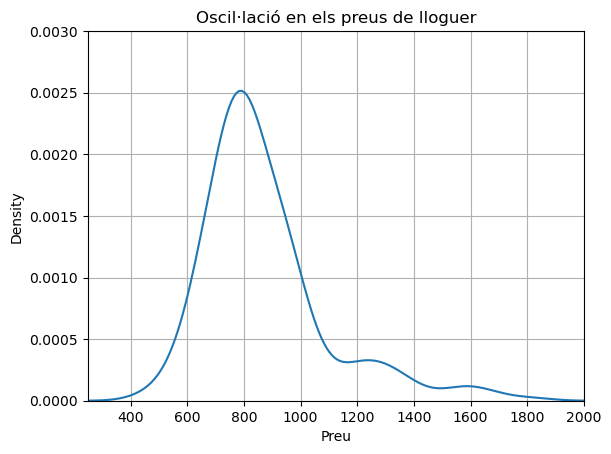

In [88]:
#S'utilitza una variable numèrica 'Preu'. 

sns.kdeplot(preu_mes['Preu'])
plt.title('Oscil·lació en els preus de lloguer')
plt.axis([250,2000,0,0.0030])
plt.savefig('densitat_preu.png') #S'exporta el gràfic en format imatge png
plt.grid(True)
plt.show()


En aquest gràfic s'observa clarament la tendència dels preus del lloguer. S'observa com la majoria de preus de lloguers es troben als 800 euros. 

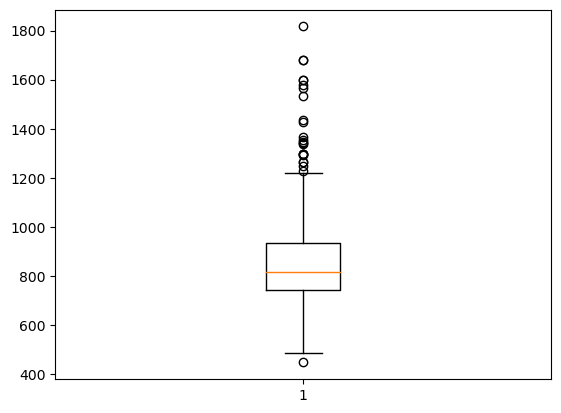

In [111]:
#S'utilitza una variable numèrica 'Preu' segons el mes. 

fig, ax = plt.subplots()
ax.boxplot(preu_mes['Preu'])
plt.savefig('boxplot_preu.png') #S'exporta el gràfic en format imatge png
plt.show()

S'utlitza un plotbox per a veure que la mitjana dels preus dels lloguers a Barcelona es troba als 800 euros. Però veiem com tenim dades interessants en relació a la gràfica anterior. Tot i utilitzant la mateixa variable aquí s'observa que hi ha molts valors atípics que es troben lluny de la mitjana de preu. Arribant fins a un màxim de 1800 euros.

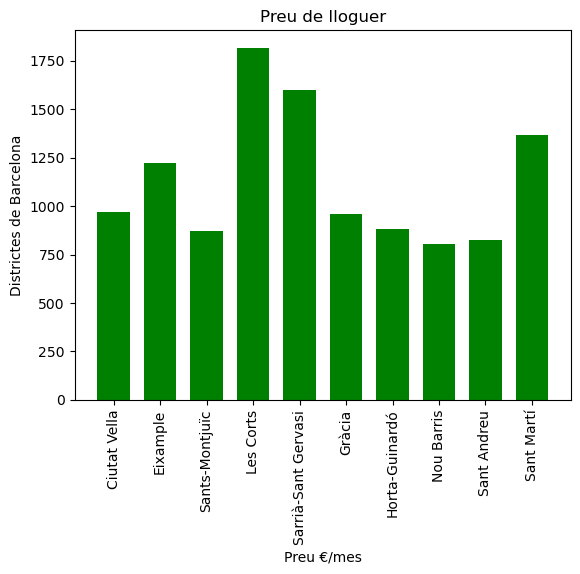

In [62]:
#Gràfic que mostra el preu de lloguer al mes per districtes.Es mostra la variable categorica 'Districtes' amb la variable numèrica 'Preu' 
#S'observa els preus dels lloguers per barris.

plt.bar(preu_mes['Nom_Districte'],preu_mes['Preu'], color='g', width = 0.7)
plt.xlabel('Preu €/mes')
plt.xticks(rotation=90)
plt.ylabel('Districtes de Barcelona')
plt.title('Preu de lloguer')
plt.savefig('grafic_preu_districte.png')
plt.show()




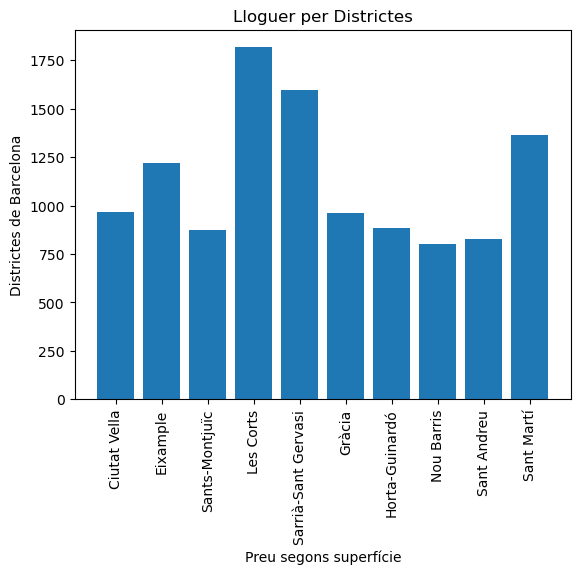

In [96]:
#Es mostra la variable categorica 'Districtes' amb la variable numèrica 'Preu' segons superfície.
#S'observa els preus dels lloguers per barris en un format de barras.

plt.bar(preu_superficie['Nom_Districte'],preu_mes['Preu'])
plt.xlabel('Preu segons superfície')
plt.xticks(rotation=90)
plt.ylabel('Districtes de Barcelona')
plt.title('Lloguer per Districtes')
plt.show()


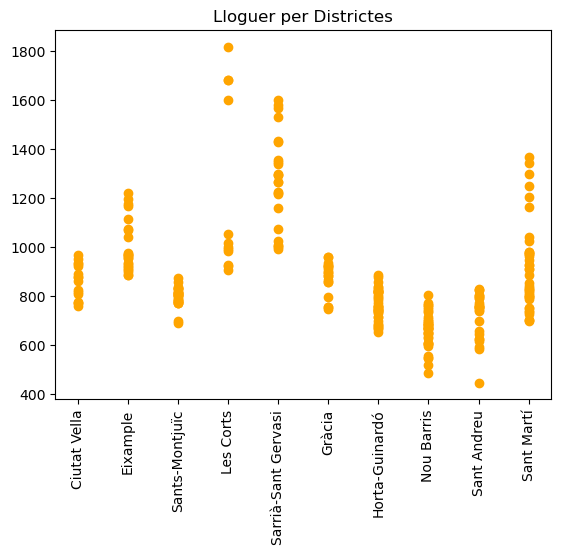

In [38]:
#Es mostra la variable categòrica 'Districtes' amb la variable numèrica 'Preu'.
#S'observa els preus dels lloguers per barris en format scatter.

plt.scatter(preu_mes['Nom_Districte'],preu_mes['Preu'],color='orange')
plt.xticks(rotation=90)
plt.title('Lloguer per Districtes')
plt.savefig('grafic_preu_districte_scatter.png') #S'exporta el gràfic en format imatge png
plt.show()

Es mostra la variable categòrica 'Districtes' amb la variable numèrica 'Preu' mes. S'observa les variances de preus dels lloguers dins de cada districtes de mamera molt visual.
Aquí detectem com les corts té valors amb preus extrems, per això a l'anterior gràfica fa que sigui la més alta. Aquest districte conté el barri de Pedralbes, per això en fa que pugi la seva mitja. A més es tracta del districte amb menys valors fet que altera una mica les gràfiques de barres anteriors. Per contra, la resta de districtes oscilen en preus similars.

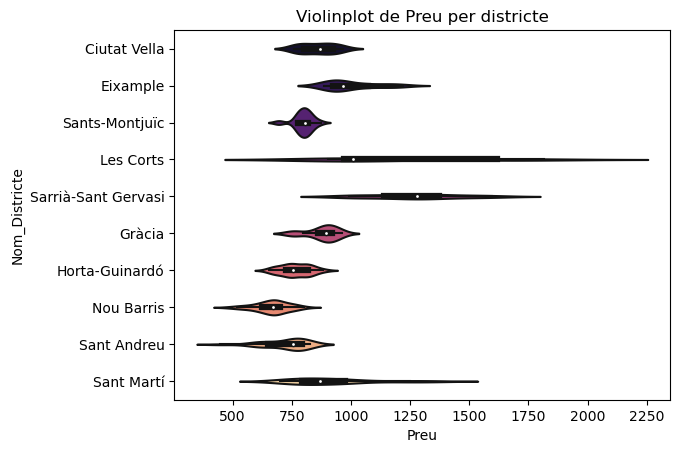

In [222]:
sns.violinplot(x='Preu', y='Nom_Districte', data=preu_mes, palette='magma')
plt.title('Violinplot de Preu per districte')
plt.savefig('grafic_violinplot.png') #S'exporta el gràfic en format imatge png
plt.show()

Aquí s'observa la densitat de les dades en funció dels valors extrems o baixa quantitat de dades en els diferents districtes de la ciutat de Barcelona. On observem violins molt estrets amb escasa forma, indica la manca d'homogeneitat en les dades, com en el cas de Les Corts o Sarrià-Sant Gervasi ja que tenen valors extrems com ja hem identificat a la gràfica anterior. Visualment podem destacar els districtes amb formes més amples com Sants-Montjuïc mostren la moda i unes dades típiques. 

- Dues variables numèriques (Any o Trimestre i Preu)

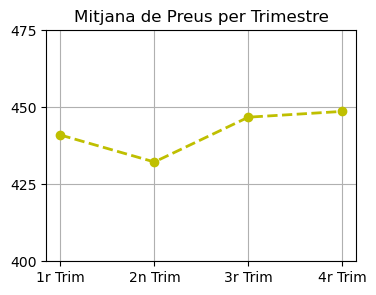

In [108]:
#Es mostra la variable numèrica 'Trimestre' amb la variable numèrica 'Preu'.
#Es crea un nou dataframe amb la mitjana de preus segons trimestre

plt.figure(figsize=(4, 3))
datos1= lloguer.groupby('Trimestre')['Preu'].mean().reset_index()
plt.plot(datos1['Trimestre'],datos1['Preu'],marker='o',linestyle='--',linewidth=2 , color='y')
plt.ylabel=('Euros')
plt.title('Mitjana de Preus per Trimestre')
plt.xticks(ticks=lloguer['Trimestre'].unique(), labels=['1r Trim', '2n Trim', '3r Trim', '4r Trim' ])
plt.yticks([400,425,450, 475])
plt.savefig('grafic_mitja_preu_trimestres.png') #S'exporta el gràfic en format imatge png
plt.grid(True)
plt.show()

S'observa com a la mitjana de preus del lloguer agrupada per Trimestres disminueix lleugerament del 1r al 2n trimestre. Però en general es manté. Es molt interessant com acontant el valor de l'eix y la visualització demostra la lleugeresa de la variació. Mentre que si no l'acotem, la línia que es visualitza és molt més prominent. 

- Tres variables (Barri o Districte, Trimestre i Preu)

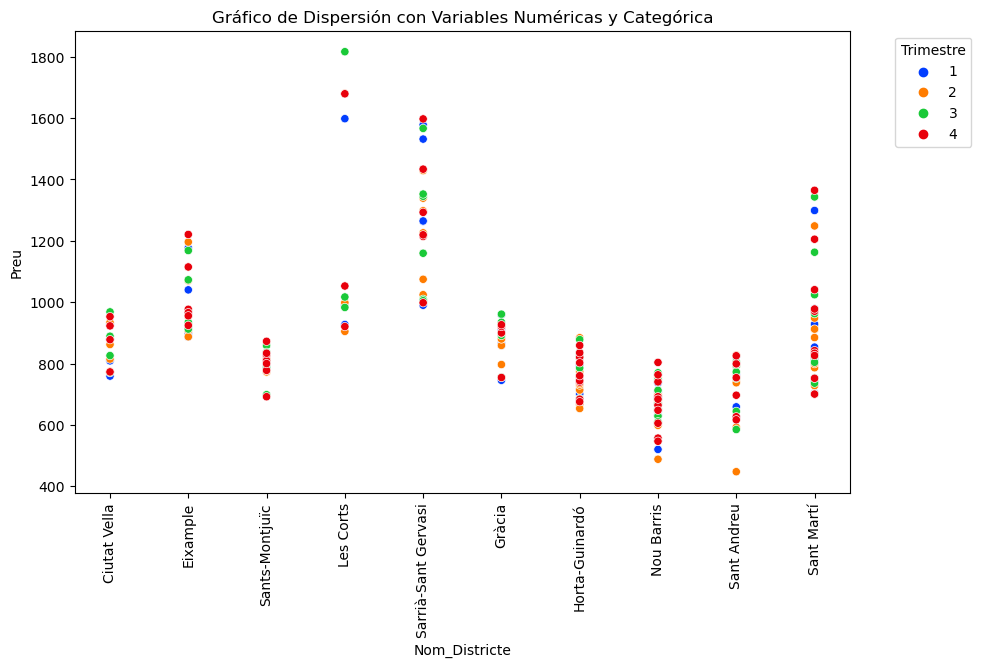

In [224]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nom_Districte', y='Preu', hue='Trimestre', data=preu_mes, palette='bright')
plt.xticks(rotation=90)
plt.legend(title='Trimestre', bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('Gráfico de Dispersión con Variables Numéricas y Categórica')
plt.savefig('scatterplot_preu_trimestres.png') #S'exporta el gràfic en format imatge png
plt.show()

S'observa un gràfic amb 3 variables, la variable categòrica de Districte amb les numèriques de Preus i Trimestre.Com s'ha mostrat anteriorment, es interessant observar els preus de l'habitatge en funció de districtes en aquest cas afegim els diferents colors per visualitzar com varien els preus segons el Trimestre. Es detecta clarament la diferencia de mostra en el districte de Les Corts. Com la oscil·lació de preus en els districtes de Sants, Ciutat Vella o Hort es menor. 

/Users/davidsdlr/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


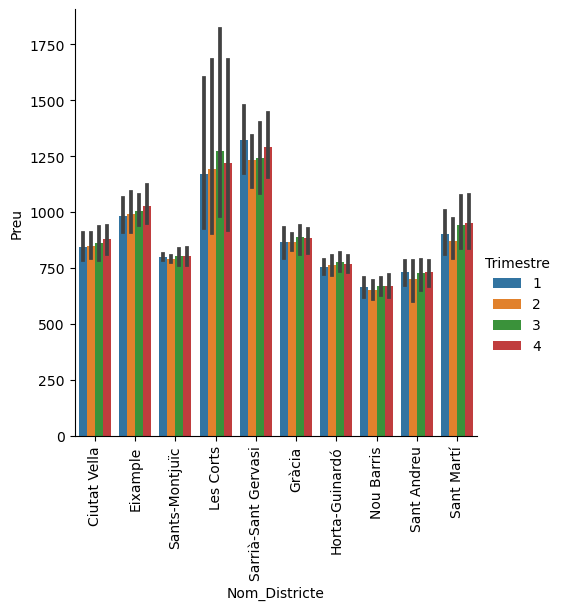

In [225]:
sns.catplot(data=preu_mes, hue="Trimestre", x="Nom_Districte", y="Preu", kind="bar")
plt.xticks(rotation=90)
plt.savefig('catplot_preu_trimestres.png') #S'exporta el gràfic en format imatge png
plt.show()

S'observa un gràfic de barres agrupades amb 3 variables, la variable categòrica de Districte amb les numèriques de Preus i Trimestre. Aquí també s'observa la desviació estándard mostrada amb les barres grises sobre cada barra. En aquest cas la visualització és més útil per mostrar les possibles variances en relació als trimestres de l'any.

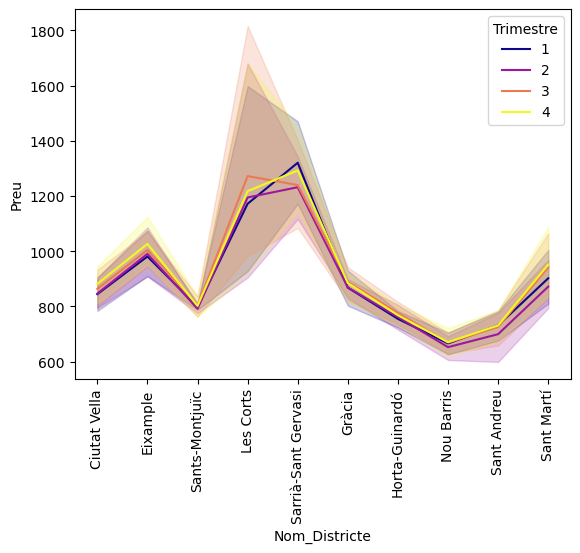

In [229]:
sns.lineplot(data=preu_mes, hue="Trimestre", x="Nom_Districte", y= 'Preu', palette='plasma')
plt.xticks(rotation=90)
plt.savefig('lineplot_preu_trimestres.png') #S'exporta el gràfic en format imatge png
plt.show()

Es interessant observar com aquest gràfic ens mostra clarament on es troba la variabilitat en els preus.
Com ja hem anat detectant anteriorment es tracta dels barris de Les Corts i Sarrià-Sant Gervasi seran menys previsibles
per això es mostra en un color més ampli. També ens mostra com les tendencies en relació al preu. En aquest cas es veu com les diferents líneas segons trimestre es mantenen per igual en els diferents barris.

## Exercici 2 i 3 s'han fet al llarg de l'exercici 1
Exporta els gràfics com imatges o com HTML.

Proposa alguna visualització que creguis que pot resultar interessant.